In [1]:
# --------------------------------------------
# 📌 TASK 3: Heart Disease Prediction
# Step 2: Import libraries and load dataset
# --------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the heart disease dataset (must be in same folder)
df = pd.read_csv("heart.csv")

# Show the shape and first few rows
print("🧾 Dataset Shape:", df.shape)
df.head()


🧾 Dataset Shape: (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
# --------------------------------------------
# Step 3: Clean the Dataset – Check for Issues
# --------------------------------------------

# Check for missing values in any column
print("🔍 Missing Values per Column:")
print(df.isnull().sum())

# View data types and non-null counts
print("\n📋 Data Info:")
print(df.info())


🔍 Missing Values per Column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

📋 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDise

In [3]:
# --------------------------------------------
# Step 4: Encode Categorical Columns
# Using One-Hot Encoding for object-type features
# --------------------------------------------

# Check object-type columns
object_cols = df.select_dtypes(include='object').columns
print("🧩 Categorical Columns to Encode:", object_cols.tolist())

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=object_cols, drop_first=True)

# Show new shape and first few rows
print("✅ New Dataset Shape After Encoding:", df_encoded.shape)
df_encoded.head()


🧩 Categorical Columns to Encode: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
✅ New Dataset Shape After Encoding: (918, 16)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [4]:
object_cols = df.select_dtypes(include='object').columns
print("🧩 Categorical Columns to Encode:", object_cols.tolist())

df_encoded = pd.get_dummies(df, columns=object_cols, drop_first=True)

print("✅ New Dataset Shape After Encoding:", df_encoded.shape)
df_encoded.head()


🧩 Categorical Columns to Encode: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
✅ New Dataset Shape After Encoding: (918, 16)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


C:\Users\aq573\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


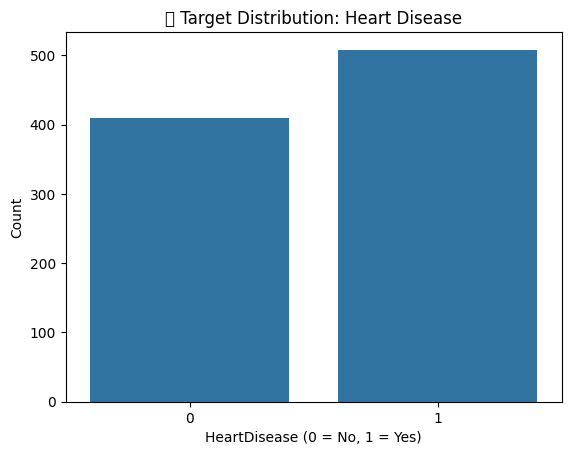

In [5]:
# --------------------------------------------
# EDA – Target Variable Distribution
# --------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='HeartDisease')
plt.title("🩺 Target Distribution: Heart Disease")
plt.xlabel("HeartDisease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


C:\Users\aq573\AppData\Local\Temp\ipykernel_1784\1115631205.py:6: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\aq573\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


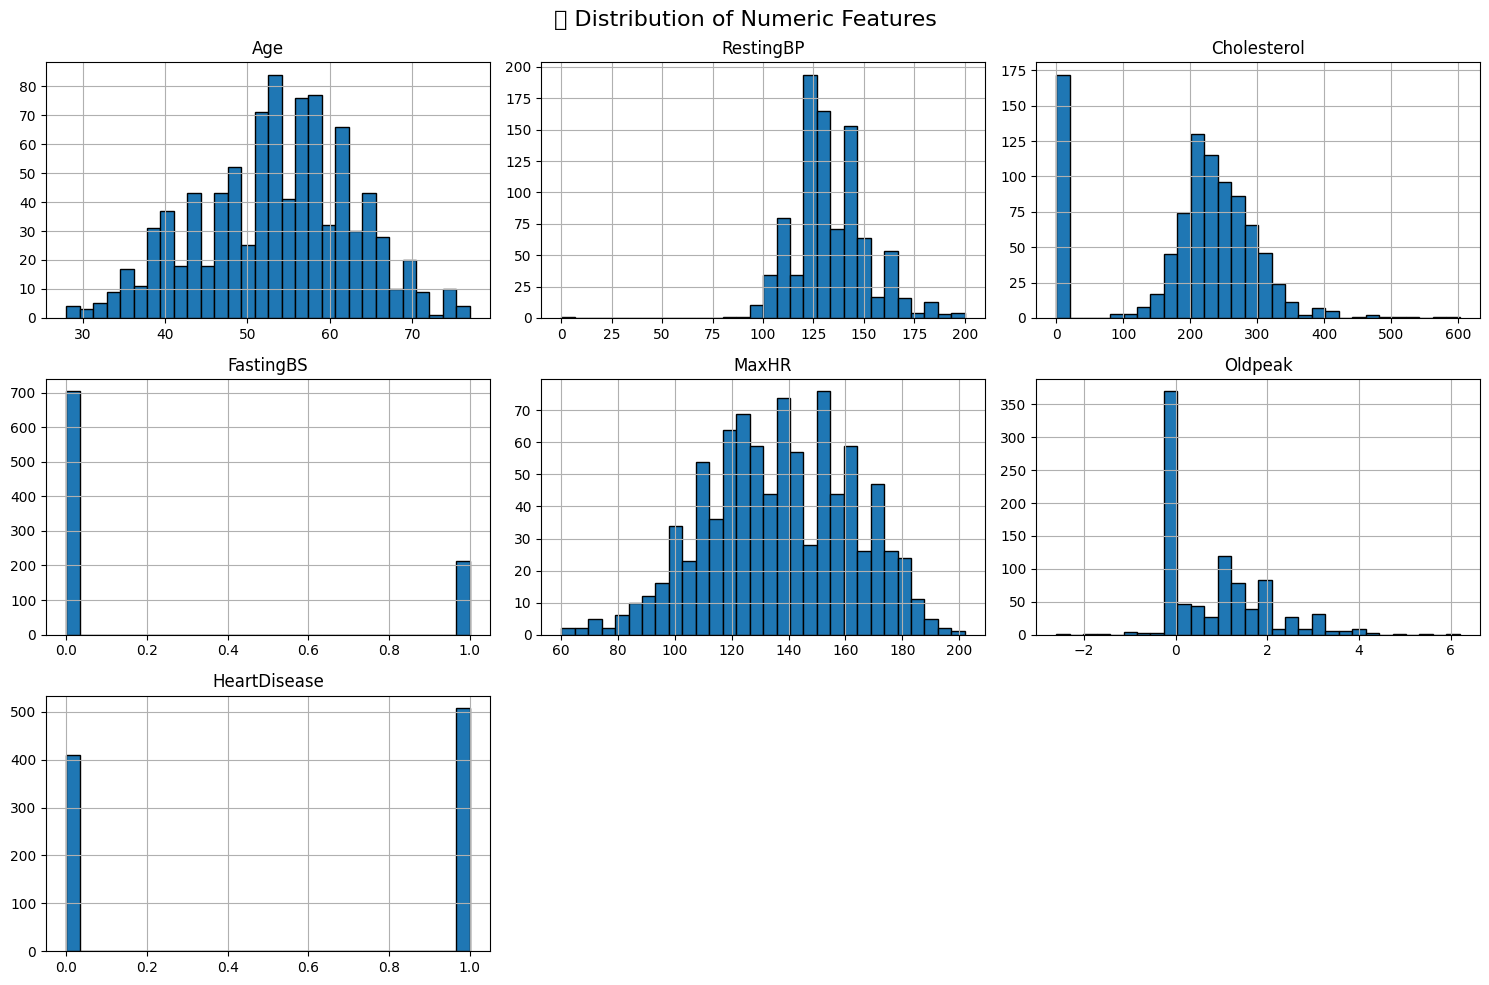

In [6]:
# --------------------------------------------
# EDA – Histograms of All Features
# --------------------------------------------
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("📊 Distribution of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\aq573\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


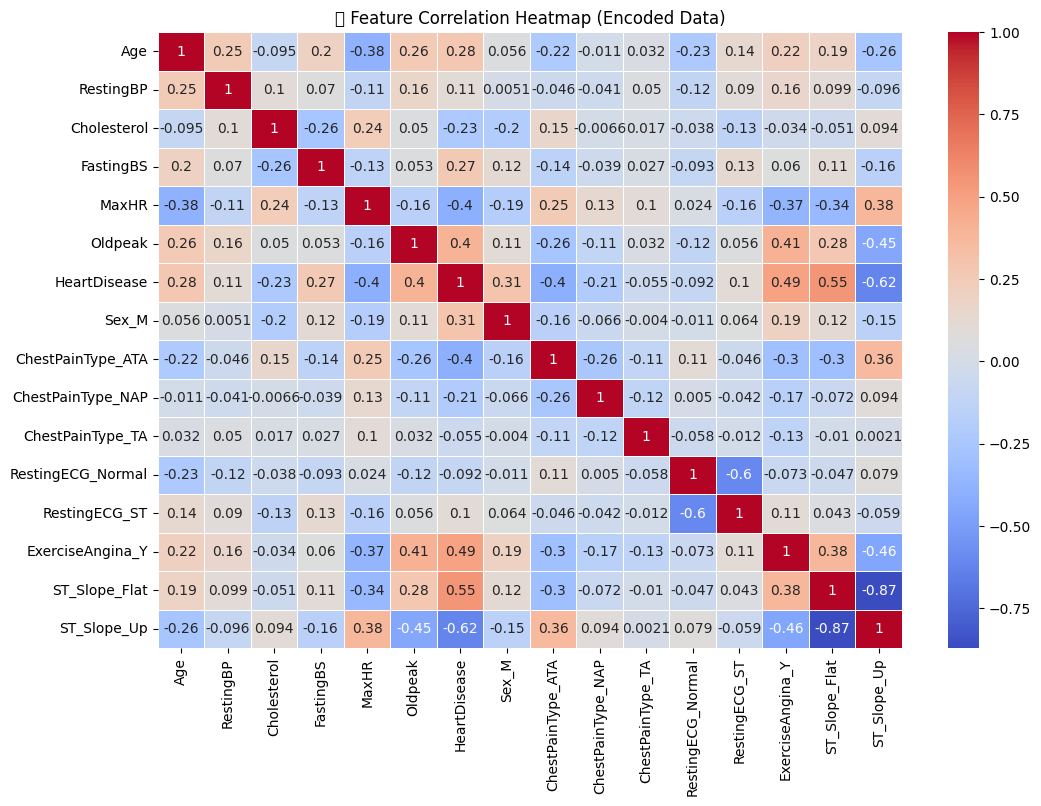

In [8]:
# --------------------------------------------
# EDA – Correlation Heatmap (Fixed)
# Use df_encoded instead of df
# --------------------------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("🔗 Feature Correlation Heatmap (Encoded Data)")
plt.show()


C:\Users\aq573\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129491 (\N{OLDER ADULT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


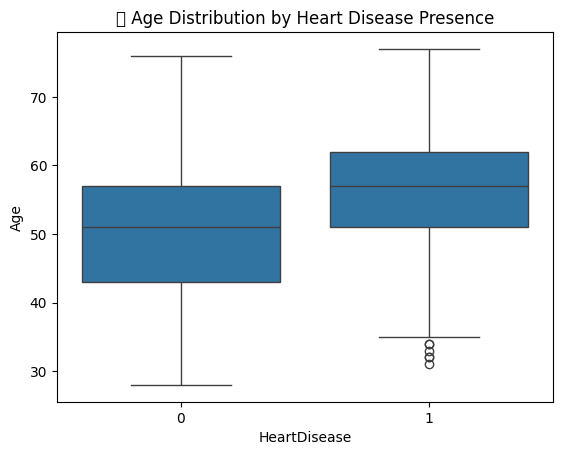

In [9]:
# --------------------------------------------
# EDA – Age vs Heart Disease (Boxplot)
# --------------------------------------------
sns.boxplot(data=df, x='HeartDisease', y='Age')
plt.title("🧓 Age Distribution by Heart Disease Presence")
plt.xlabel("HeartDisease")
plt.ylabel("Age")
plt.show()


In [16]:
# --------------------------------------------
# Step 5: Feature Selection and Train/Test Split
# --------------------------------------------

from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('HeartDisease', axis=1)  # All features
y = df_encoded['HeartDisease']               # Target label

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Show dimensions of each set
print("🧪 Training Set:", X_train.shape)
print("🧪 Testing Set:", X_test.shape)


🧪 Training Set: (734, 15)
🧪 Testing Set: (184, 15)


In [17]:
# -------------------------------------------------------------
# ✅ STEP 6: Train Logistic Regression and Decision Tree Models
# -------------------------------------------------------------

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# --------------------------------------------
# 🔹 Step 6.1: Scale the features (only for Logistic Regression)
# --------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------------
# 🔹 Step 6.2: Train Logistic Regression on Scaled Data
# --------------------------------------------
log_model = LogisticRegression(max_iter=1000)  # Allow more iterations to avoid convergence warnings
log_model.fit(X_train_scaled, y_train)

# Predict on test set
log_preds = log_model.predict(X_test_scaled)

# --------------------------------------------
# 🔹 Step 6.3: Train Decision Tree on Original Data (no scaling needed)
# --------------------------------------------
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Predict on test set
tree_preds = tree_model.predict(X_test)

# --------------------------------------------
# ✅ Display sample predictions to confirm it's working
# --------------------------------------------
print("✅ Logistic Regression Predictions:", log_preds[:5])
print("✅ Decision Tree Predictions:", tree_preds[:5])
print("✅ Both models trained successfully.")


✅ Logistic Regression Predictions: [0 0 1 1 0]
✅ Decision Tree Predictions: [0 1 1 1 0]
✅ Both models trained successfully.


🔎 Logistic Regression Accuracy: 0.853
🌳 Decision Tree Accuracy: 0.875


C:\Users\aq573\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


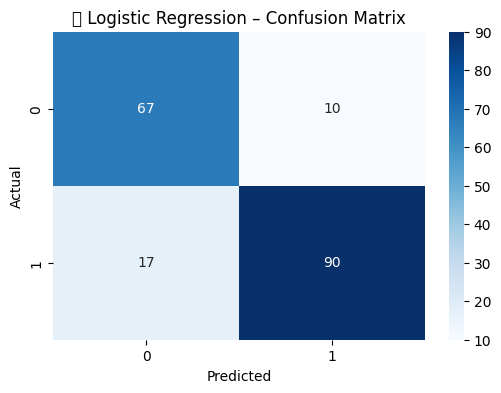

C:\Users\aq573\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


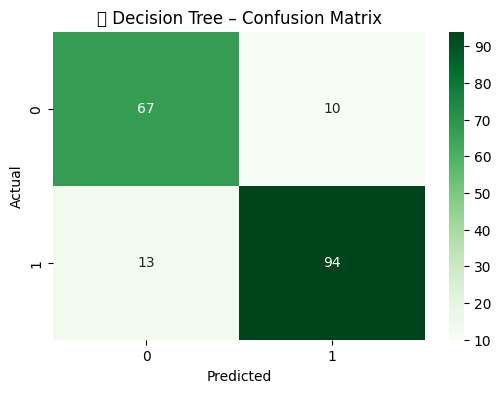

🎯 Logistic Regression AUC Score: 0.927
🎯 Decision Tree AUC Score: 0.92


C:\Users\aq573\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


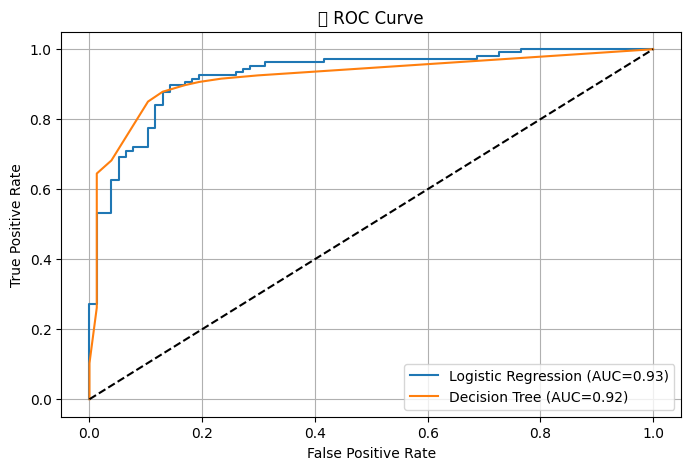

In [18]:
# -------------------------------------------------------
# ✅ STEP 7: Evaluate Both Models – Accuracy, Confusion Matrix, ROC-AUC
# -------------------------------------------------------

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------
# Accuracy Scores
# ------------------------
log_acc = accuracy_score(y_test, log_preds)
tree_acc = accuracy_score(y_test, tree_preds)

print("🔎 Logistic Regression Accuracy:", round(log_acc, 3))
print("🌳 Decision Tree Accuracy:", round(tree_acc, 3))

# ------------------------
# Confusion Matrices
# ------------------------
log_cm = confusion_matrix(y_test, log_preds)
tree_cm = confusion_matrix(y_test, tree_preds)

# Plot confusion matrix (Logistic Regression)
plt.figure(figsize=(6, 4))
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues')
plt.title("📊 Logistic Regression – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot confusion matrix (Decision Tree)
plt.figure(figsize=(6, 4))
sns.heatmap(tree_cm, annot=True, fmt='d', cmap='Greens')
plt.title("🌳 Decision Tree – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ------------------------
# ROC Curve + AUC Score
# ------------------------

# Get predicted probabilities
log_probs = log_model.predict_proba(X_test_scaled)[:, 1]
tree_probs = tree_model.predict_proba(X_test)[:, 1]

# AUC Scores
log_auc = roc_auc_score(y_test, log_probs)
tree_auc = roc_auc_score(y_test, tree_probs)

print("🎯 Logistic Regression AUC Score:", round(log_auc, 3))
print("🎯 Decision Tree AUC Score:", round(tree_auc, 3))

# ROC Curve Points
log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(log_fpr, log_tpr, label=f"Logistic Regression (AUC={round(log_auc, 2)})")
plt.plot(tree_fpr, tree_tpr, label=f"Decision Tree (AUC={round(tree_auc, 2)})")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("📈 ROC Curve")
plt.legend()
plt.grid()
plt.show()


C:\Users\aq573\AppData\Local\Temp\ipykernel_1784\1859062865.py:15: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\aq573\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


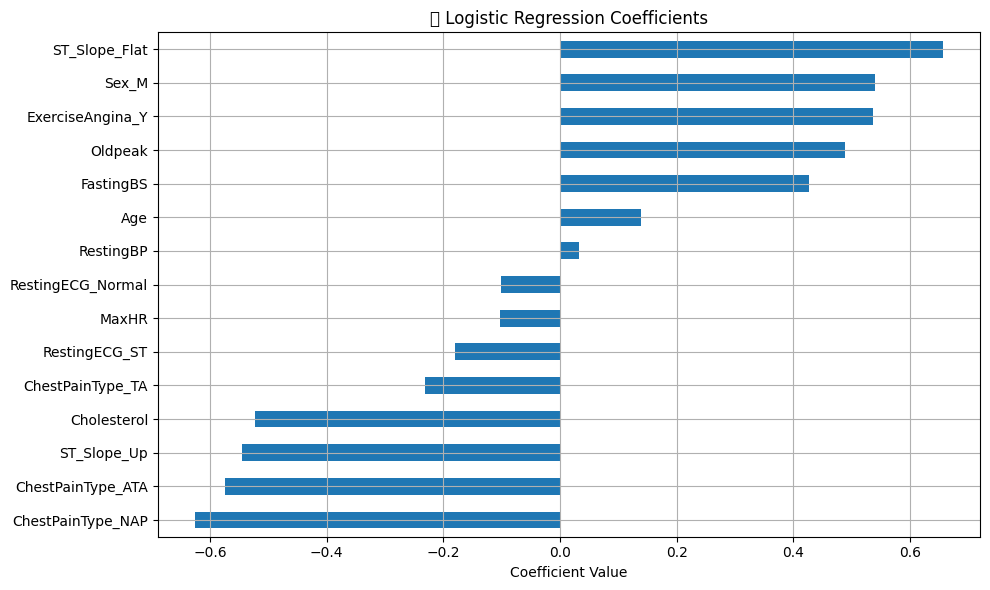

C:\Users\aq573\AppData\Local\Temp\ipykernel_1784\1859062865.py:25: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\aq573\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


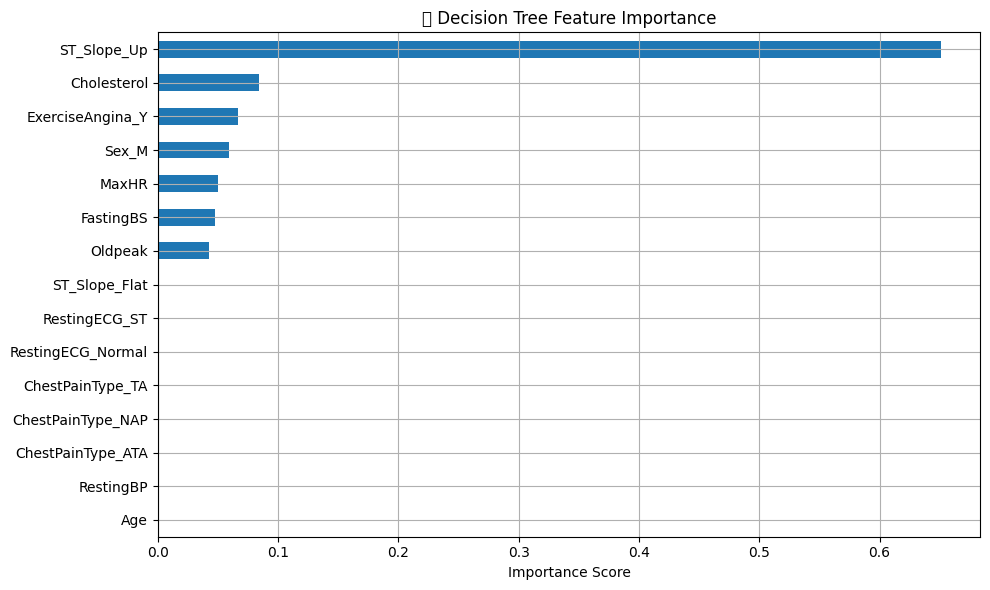

In [19]:
# -------------------------------------------------------
# ✅ STEP 8: Feature Importance and Final Insights
# -------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# Logistic Regression – Coefficients
# ----------------------------
log_coefficients = pd.Series(log_model.coef_[0], index=X.columns)
log_coefficients.sort_values().plot(kind='barh', figsize=(10, 6), title="🔍 Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# Decision Tree – Feature Importance
# ----------------------------
tree_importances = pd.Series(tree_model.feature_importances_, index=X.columns)
tree_importances.sort_values().plot(kind='barh', figsize=(10, 6), title="🌳 Decision Tree Feature Importance")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()
